In [11]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.impute import SimpleImputer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
dataset_path = "/kaggle/input/mri-image-brest-cancer/Breast Cancer Patients MRI/"
os.listdir(dataset_path)

['validation', 'train']

In [13]:
# DImensiones de las imagenes 
img_width, img_height = 150, 150

# Definir rutas especificas
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "validation")


In [14]:
# Aumentación de datos

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 1400 images belonging to 2 classes.
Found 680 images belonging to 2 classes.


In [15]:
# CREAR EL MODELO CNN

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(), 
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') #Sigmoid porque solo revisa 2: Cancer o no cancer
])



In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
# Entrenamiento del modelo
history = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - accuracy: 0.5339 - loss: 0.7744 - val_accuracy: 0.5765 - val_loss: 0.6805
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.5748 - loss: 0.6801 - val_accuracy: 0.5265 - val_loss: 0.6955
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.5631 - loss: 0.6790 - val_accuracy: 0.4765 - val_loss: 0.7163
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.5679 - loss: 0.6739 - val_accuracy: 0.4971 - val_loss: 0.7381
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - accuracy: 0.5900 - loss: 0.6619 - val_accuracy: 0.4897 - val_loss: 0.7036
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.5909 - loss: 0.6628 - val_accuracy: 0.4632 - val_loss: 0.7087
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.5895 - loss: 0.6627 - val_accuracy: 0.5838 - val_loss: 0.6888
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.6149 - loss: 0.6490 - val_accuracy: 0

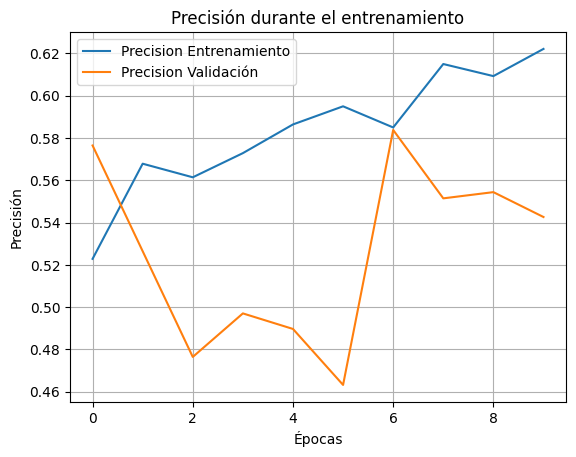

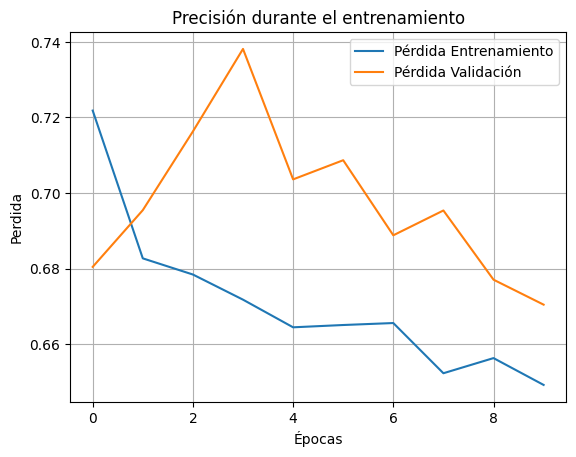

In [18]:
# Visualizacion del plot
plt.plot(history.history['accuracy'], label='Precision Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precision Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Perdida')
plt.legend()
plt.grid(True)
plt.show()

 /kaggle/input/mri-image-brest-cancer/Breast Cancer Patients MRI/validation/Healthy/H_334.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


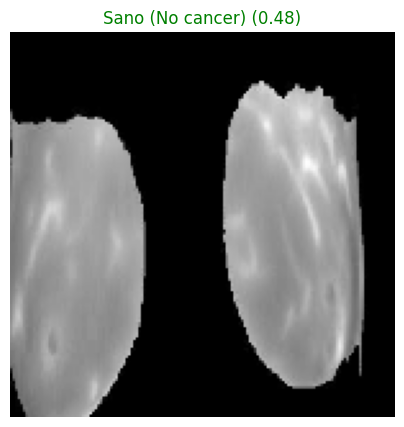

In [24]:
healthy_dir = os.path.join(test_dir, 'Healthy')

try:
    files = os.listdir(healthy_dir)
    if len(files) > 0:
        image_name = files[0] 
        test_image_path = os.path.join(healthy_dir, image_name)
        print(f" {test_image_path}")
    else:
        print(f"Error: No se encontraron imágenes en {healthy_dir}")
        test_image_path = ""
except FileNotFoundError:
    print(f"Error: El directorio {healthy_dir} no existe.")
    test_image_path = ""

if test_image_path:
    img = cv2.imread(test_image_path)

    if img is None:
        print("Error crítico: cv2.imread devolvió None. La imagen está corrupta o la ruta sigue mal.")
    else:
        # Procesamiento
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (img_width, img_height))

        img_normalized = img_resized / 255.0
        img_input = np.expand_dims(img_normalized, axis=0)

        # Predicción
        prediction = model.predict(img_input)[0][0]

        if prediction > 0.5:
            resultado = "Cancer detectado"
            color = "red"
        else: 
            resultado = "Sano (No cancer)"
            color = "green"

        # Visualización
        plt.figure(figsize=(5,5))
        plt.imshow(img_resized)
        plt.title(f"{resultado} ({prediction:.2f})", color=color)
        plt.axis('off')
        plt.show()